In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files


In [ ]:
JAMB_Results = pd.read_csv('jamb_exam_results.csv')
JAMB_Results.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [ ]:
# @title Clean Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
#Remove Unnecessary Columns

JAMB_Results = JAMB_Results.drop('Student_ID', axis = 1)
JAMB_Results.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1


In [ ]:
#Deal with Nulls (5000 total data points)

# check for nulls
print("null check: \n", JAMB_Results.isnull().sum())
print()

# check rate of each occurance for Parent_Education_Level
print("Parent_Education_Level Check: \n", JAMB_Results['Parent_Education_Level'].value_counts())
print()

# rate of occurances is relatively similar, so create a new filler value called "missing"
JAMB_Results['Parent_Education_Level'] = JAMB_Results['Parent_Education_Level'].fillna('Missing')
print(JAMB_Results['Parent_Education_Level'].value_counts())

null check: 
 JAMB_Score                        0
Study_Hours_Per_Week              0
Attendance_Rate                   0
Teacher_Quality                   0
Distance_To_School                0
School_Type                       0
School_Location                   0
Extra_Tutorials                   0
Access_To_Learning_Materials      0
Parent_Involvement                0
IT_Knowledge                      0
Age                               0
Gender                            0
Socioeconomic_Status              0
Parent_Education_Level          891
Assignments_Completed             0
dtype: int64

Parent_Education_Level Check: 
 Parent_Education_Level
Secondary    1556
Primary      1335
Tertiary     1218
Name: count, dtype: int64

Parent_Education_Level
Secondary    1556
Primary      1335
Tertiary     1218
Missing       891
Name: count, dtype: int64


In [ ]:
# @title EDA


Text(0, 0.5, 'JAMB Score')

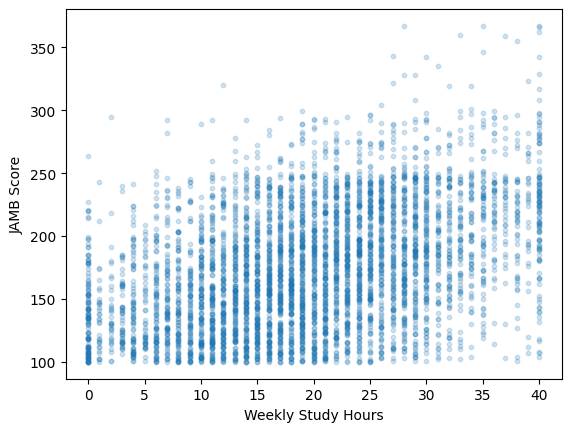

In [ ]:
#JAMB_Score vs. Study_Hours_Per_Week
plt.scatter(JAMB_Results['Study_Hours_Per_Week'], JAMB_Results['JAMB_Score'], s = 10, alpha = 0.2)
plt.xlabel('Weekly Study Hours')
plt.ylabel('JAMB Score')


Text(0, 0.5, 'JAMB Score')

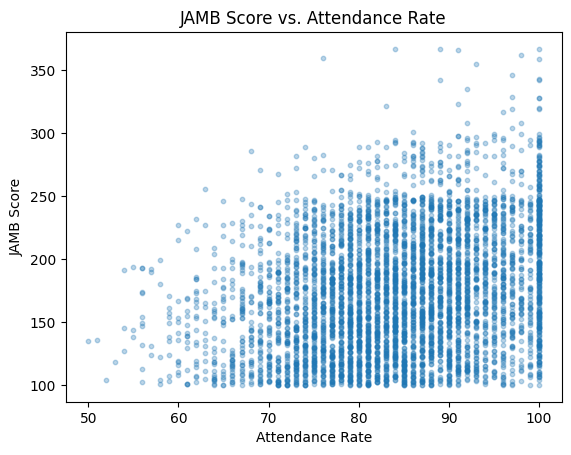

In [ ]:
#JAMB_Score vs. Attendance Rate
plt.scatter(JAMB_Results['Attendance_Rate'], JAMB_Results['JAMB_Score'], s = 10, alpha = 0.3)
plt.title('JAMB Score vs. Attendance Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('JAMB Score')

#seems like a fairly good indicator (increased attendance = increased score)

                 JAMB_Score
Teacher_Quality            
1                     145.0
2                     161.0
3                     179.0
4                     192.0
5                     221.0


<Axes: xlabel='Teacher_Quality', ylabel='JAMB_Score'>

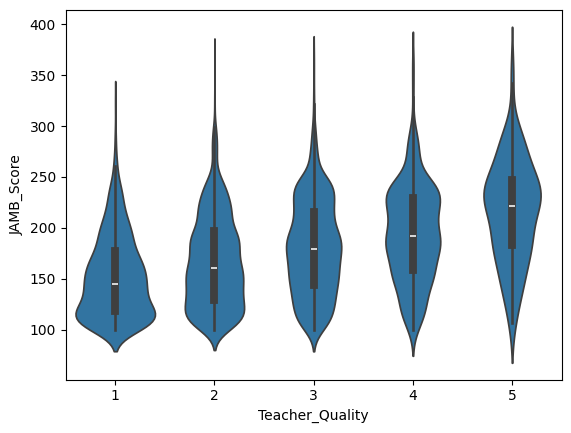

In [ ]:
#JAMB_Score vs. Teacher_Quality

#Teacher_Quality_means = JAMB_Results[['JAMB_Score', 'Teacher_Quality']].groupby('Teacher_Quality').mean()
Teacher_Quality_means = JAMB_Results[['JAMB_Score', 'Teacher_Quality']].groupby('Teacher_Quality').median()
print(Teacher_Quality_means)

sns.violinplot(data=JAMB_Results[['JAMB_Score', 'Teacher_Quality']], x="Teacher_Quality", y="JAMB_Score", order = ['1', '2', '3', '4', '5'])

Text(0, 0.5, 'JAMB Score')

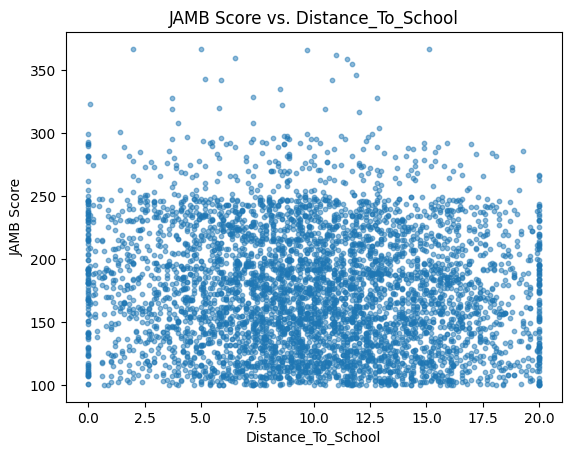

In [ ]:
#JAMB_Score vs. Distance_To_School
plt.scatter(JAMB_Results['Distance_To_School'], JAMB_Results['JAMB_Score'], s = 10, alpha = 0.5)
plt.title('JAMB Score vs. Distance_To_School')
plt.xlabel('Distance_To_School')
plt.ylabel('JAMB Score')

#Not a good indicator, should be dropped when making model

             JAMB_Score
School_Type            
Private           178.0
Public            167.0


<Axes: xlabel='School_Type', ylabel='JAMB_Score'>

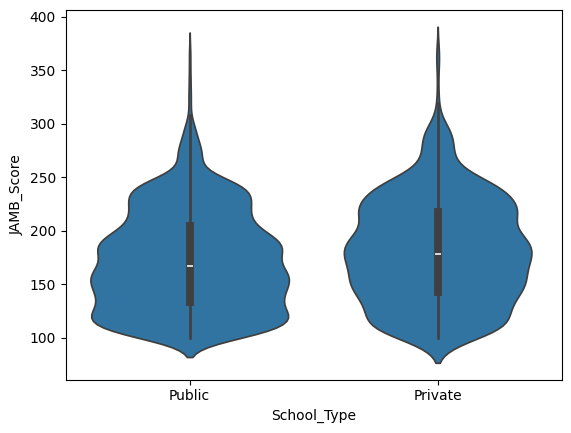

In [ ]:
# JAMB_Score vs School_Type

School_Type_medians = JAMB_Results[['JAMB_Score', 'School_Type']].groupby('School_Type').median()
print(School_Type_medians)

sns.violinplot(data=JAMB_Results[['JAMB_Score', 'School_Type']], x="School_Type", y="JAMB_Score")

#shape of violin plot indicates that private school students skew higher than public school students

                 JAMB_Score
School_Location            
Rural                 169.0
Urban                 170.5


<Axes: xlabel='School_Location', ylabel='JAMB_Score'>

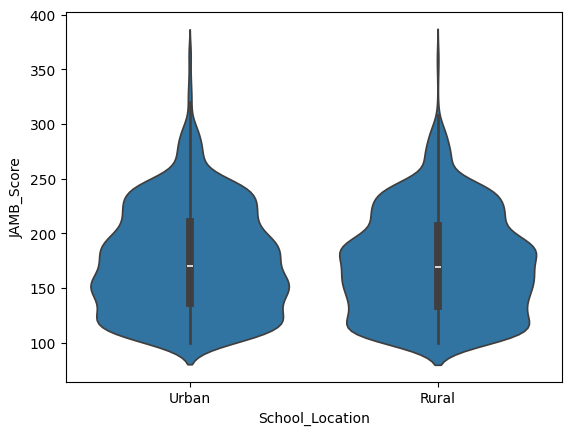

In [ ]:
# JAMB_Score vs School_Location

School_Location_medians = JAMB_Results[['JAMB_Score', 'School_Location']].groupby('School_Location').median()
print(School_Location_medians)

sns.violinplot(data=JAMB_Results[['JAMB_Score', 'School_Location']], x="School_Location", y="JAMB_Score")

#Very similar shapes (probably won't help with model)

                 JAMB_Score
Extra_Tutorials            
No                    166.0
Yes                   173.0


<Axes: xlabel='Extra_Tutorials', ylabel='JAMB_Score'>

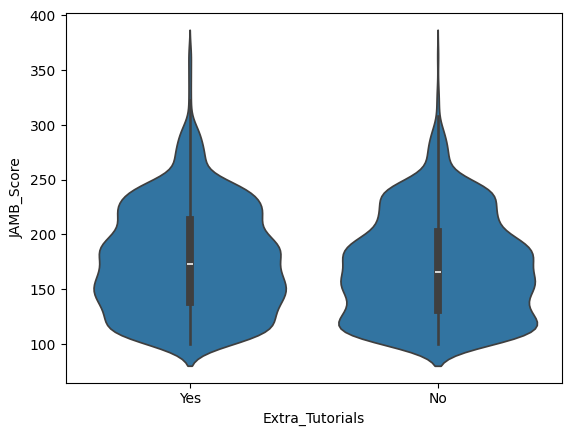

In [ ]:
# JAMB_Score vs Extra_Tutorials

Extra_Tutorials_medians = JAMB_Results[['JAMB_Score', 'Extra_Tutorials']].groupby('Extra_Tutorials').median()
print(Extra_Tutorials_medians)

sns.violinplot(data=JAMB_Results[['JAMB_Score', 'Extra_Tutorials']], x="Extra_Tutorials", y="JAMB_Score")

#Very similar shapes but upward skew for extra tutorials which could help the model

                              JAMB_Score
Access_To_Learning_Materials            
No                                 166.0
Yes                                172.0


<Axes: xlabel='Access_To_Learning_Materials', ylabel='JAMB_Score'>

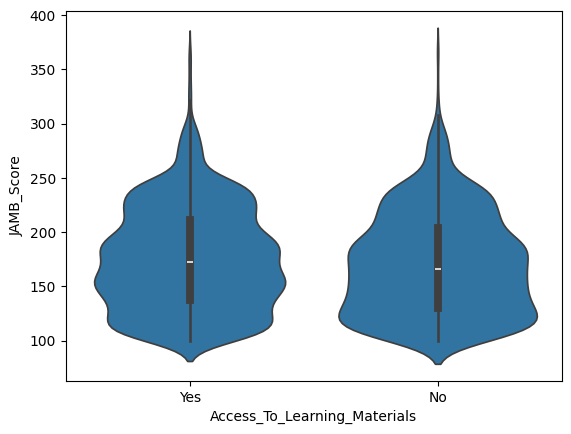

In [ ]:
# JAMB_Score vs Access_To_Learning_Materials

Access_To_Learning_Materials_medians = JAMB_Results[['JAMB_Score', 'Access_To_Learning_Materials']].groupby('Access_To_Learning_Materials').median()
print(Access_To_Learning_Materials_medians)

sns.violinplot(data=JAMB_Results[['JAMB_Score', 'Access_To_Learning_Materials']], x="Access_To_Learning_Materials", y="JAMB_Score")

# Almost has the exact same shape as Extra_Tutorials column so we just need to pick one (I think Extra_Tutorials is better)

                    JAMB_Score
Parent_Involvement            
High                     185.0
Low                      161.0
Medium                   167.0


<Axes: xlabel='Parent_Involvement', ylabel='JAMB_Score'>

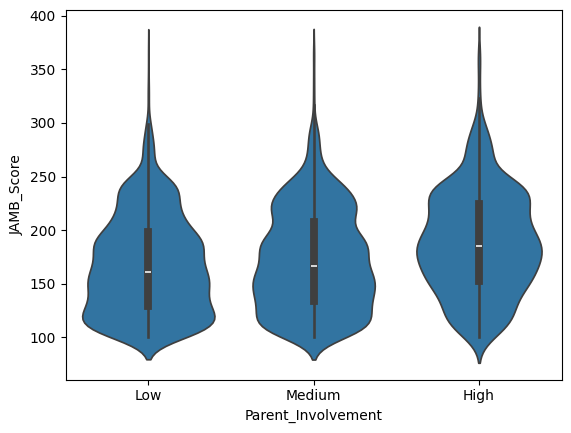

In [ ]:
#JAMB_Score vs Parent_Involvement

Parent_Involvement_medians = JAMB_Results[['JAMB_Score', 'Parent_Involvement']].groupby('Parent_Involvement').median()
print(Parent_Involvement_medians)

sns.violinplot(data=JAMB_Results[['JAMB_Score', 'Parent_Involvement']], x="Parent_Involvement", y="JAMB_Score", order = ['Low', 'Medium', 'High'])

#REALLY GOOD INDICATOR

              JAMB_Score
IT_Knowledge            
High               186.0
Low                162.0
Medium             168.0


<Axes: xlabel='IT_Knowledge', ylabel='JAMB_Score'>

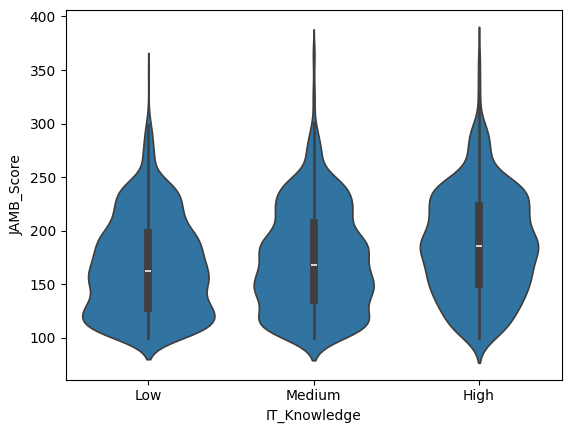

In [ ]:
#JAMB_Score vs IT_Knowledge

IT_Knowledge_medians = JAMB_Results[['JAMB_Score', 'IT_Knowledge']].groupby('IT_Knowledge').median()
print(IT_Knowledge_medians)

sns.violinplot(data=JAMB_Results[['JAMB_Score', 'IT_Knowledge']], x="IT_Knowledge", y="JAMB_Score", order = ['Low', 'Medium', 'High'])

#Another Good Indicator (You can look if you want to make a high vs. not high column instead of all 3)- it is also very similar to the above distribution

medians      JAMB_Score
Age            
15        168.0
16        176.0
17        174.0
18        167.5
19        170.0
20        167.0
21        166.5
22        168.0

means      JAMB_Score
Age            
15   172.632399
16   178.726172
17   177.427653
18   172.578370
19   174.196291
20   172.061931
21   172.391803
22   172.129952


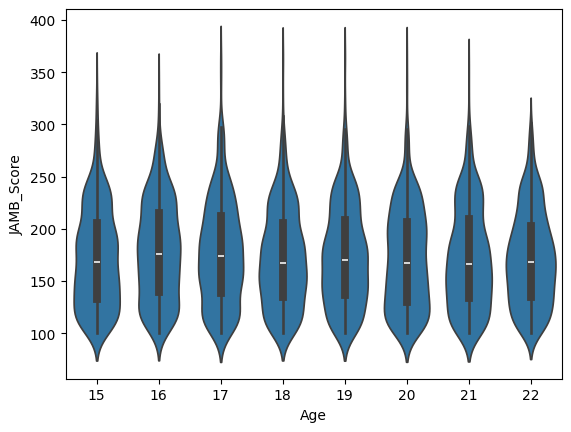

In [ ]:
#JAMB_Score vs. Age
sns.violinplot(data=JAMB_Results[['JAMB_Score', 'Age']], x="Age", y="JAMB_Score")

Age_medians = JAMB_Results[['JAMB_Score', 'Age']].groupby('Age').median()
print('medians', Age_medians)
print()

Age_means = JAMB_Results[['JAMB_Score', 'Age']].groupby('Age').mean()
print('means', Age_means)

#Not really a good indicator (No real pattern)

#maybe we should try a diff plot

medians         JAMB_Score
Gender            
Female       171.0
Male         169.0



<Axes: xlabel='Gender', ylabel='JAMB_Score'>

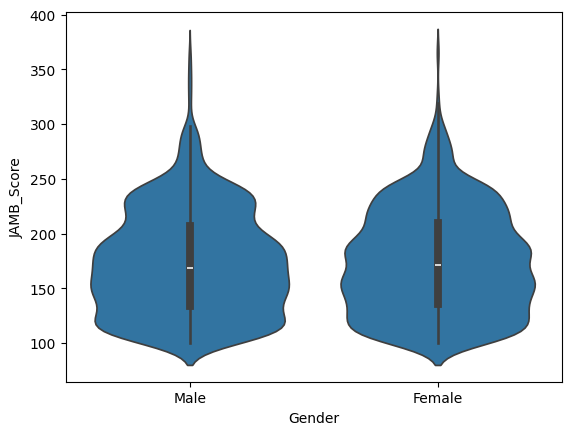

In [ ]:
#JAMB_Score vs. Gender
Gender_medians = JAMB_Results[['JAMB_Score', 'Gender']].groupby('Gender').median()
print('medians', Gender_medians)
print()

sns.violinplot(data=JAMB_Results[['JAMB_Score', 'Gender']], x="Gender", y="JAMB_Score")

#not really helpful at all

medians                       JAMB_Score
Socioeconomic_Status            
High                       190.0
Low                        160.0
Medium                     170.0



<Axes: xlabel='Socioeconomic_Status', ylabel='JAMB_Score'>

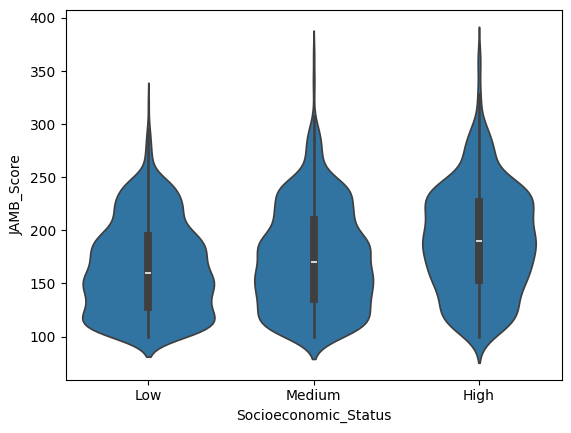

In [ ]:
#JAMB_Score vs. Socioeconomic_Status
Socioeconomic_Status_medians = JAMB_Results[['JAMB_Score', 'Socioeconomic_Status']].groupby('Socioeconomic_Status').median()
print('medians', Socioeconomic_Status_medians)
print()

sns.violinplot(data=JAMB_Results[['JAMB_Score', 'Socioeconomic_Status']], x="Socioeconomic_Status", y="JAMB_Score", order = ['Low', 'Medium', 'High'])

#Good indicator (keep all 3 levels)

medians                         JAMB_Score
Parent_Education_Level            
Missing                      158.0
Primary                      162.0
Secondary                    173.0
Tertiary                     184.0



<Axes: xlabel='Parent_Education_Level', ylabel='JAMB_Score'>

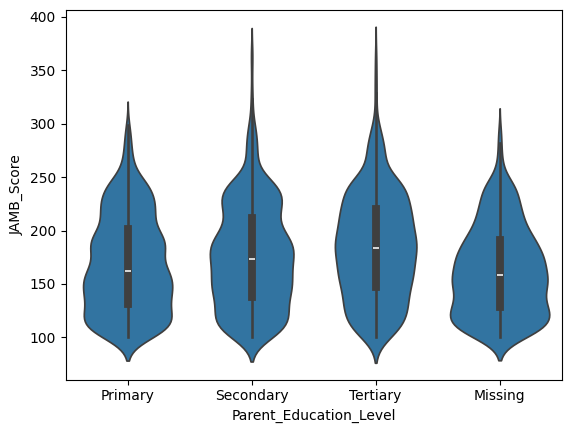

In [ ]:
#JAMB_Score vs. Parent_Education_Level
Parent_Education_Level_medians = JAMB_Results[['JAMB_Score', 'Parent_Education_Level']].groupby('Parent_Education_Level').median()
print('medians', Parent_Education_Level_medians)
print()

sns.violinplot(data=JAMB_Results[['JAMB_Score', 'Parent_Education_Level']], x="Parent_Education_Level", y="JAMB_Score", order = ['Primary', 'Secondary', 'Tertiary', 'Missing'])

#Good indicator (keep all 4 levels)
#We see that missing follows almost exact shape of primary so maybe we can fill in missing as Primary

medians                        JAMB_Score
Assignments_Completed            
1                           156.0
2                           180.0
3                           189.0
4                           198.5
5                           216.5



<Axes: xlabel='Assignments_Completed', ylabel='JAMB_Score'>

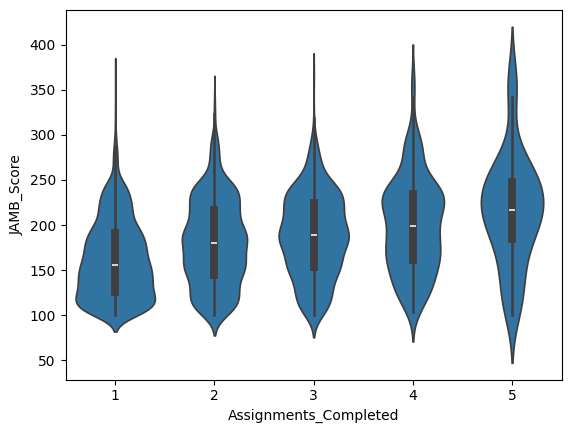

In [ ]:
#JAMB_Score vs. Assignments_Completed
Assignments_Completed_medians = JAMB_Results[['JAMB_Score', 'Assignments_Completed']].groupby('Assignments_Completed').median()
print('medians', Assignments_Completed_medians)
print()

sns.violinplot(data=JAMB_Results[['JAMB_Score', 'Assignments_Completed']], x="Assignments_Completed", y="JAMB_Score")

#Amazing indicator (keep all 5 levels)

<Axes: >

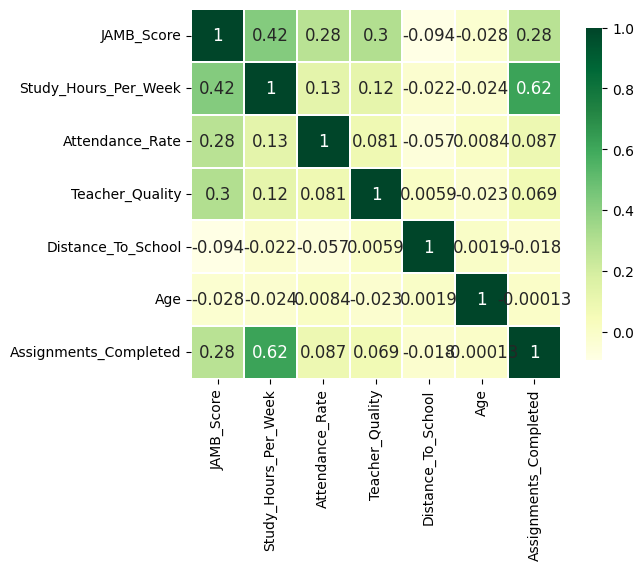

In [ ]:
#Heatmap to find correlation

# Select only numerical features for correlation calculation
numerical_features = JAMB_Results.select_dtypes(include=np.number).columns
numerical_data = JAMB_Results[numerical_features]


sns.heatmap(
        numerical_data.corr(),
        cmap = "YlGn",
        square=True,
        cbar_kws={'shrink':.9 },
        annot=True,
        linewidths=0.1,
        vmax=1.0,
        linecolor='white',
        annot_kws={'fontsize':12 })

#most columns are pretty uncorrelated so it's probably fine to use keep of them (maybe we can choose one of either study hours per week or assignments completed because both may not do anything for the model)

In [ ]:
# @title Columns to use

# @markdown Assignments_Completed, Parent_Education_Level, Socioeconomic_Status, IT_Knowledge, Parent_Involvement, Extra_Tutorials, School_Type, Teacher_Quality, Attendance_Rate, Weekly_Study_Hours

In [ ]:
# @title Feature Engineering


In [ ]:
# we can do whatever you want here but we should prob do something (maybe like teacher quality + assignments completed OR has Extra_Materials and Access_to_Learning_Materials)

medians                    JAMB_Score
HasExtraAndAccess            
False                   166.0
True                    177.0


<Axes: xlabel='HasExtraAndAccess', ylabel='JAMB_Score'>

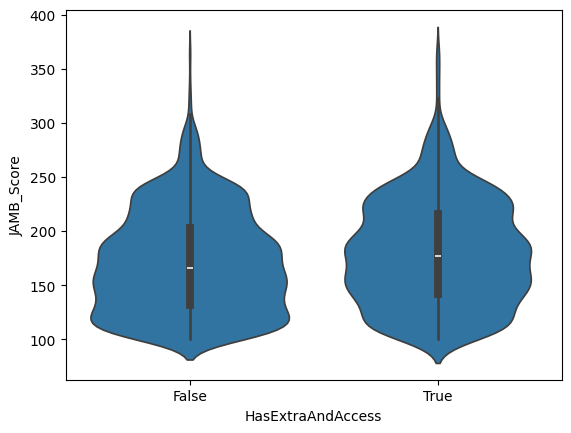

In [ ]:
#Create feature HasExtraAndAccess
JAMB_Results['HasExtraAndAccess'] = [True if JAMB_Results['Extra_Tutorials'][i] == 'Yes' and JAMB_Results['Access_To_Learning_Materials'][i] == 'Yes' else False for i in range(len(JAMB_Results))]
JAMB_Results.head()

#check relation to JAMB_Score
HasExtraAndAccess_medians = JAMB_Results[['JAMB_Score', 'HasExtraAndAccess']].groupby('HasExtraAndAccess').median()
print('medians', HasExtraAndAccess_medians)

sns.violinplot(data=JAMB_Results[['JAMB_Score', 'HasExtraAndAccess']], x="HasExtraAndAccess", y="JAMB_Score")

#THIS FEATURE IS BETTER THAN EITHER EXTRA_TUTORIALS OR ACCESS_TO_LEARNING_MATERIALS INDIVIDUALLY - maybe just use this one instead of the other two

medians                                        JAMB_Score
Teacher_Quality_Assignments_Completed            
2                                           138.0
3                                           150.0
4                                           165.0
5                                           182.0
6                                           196.0
7                                           208.0
8                                           233.0
9                                           245.0
10                                          350.5


<Axes: xlabel='Teacher_Quality_Assignments_Completed', ylabel='JAMB_Score'>

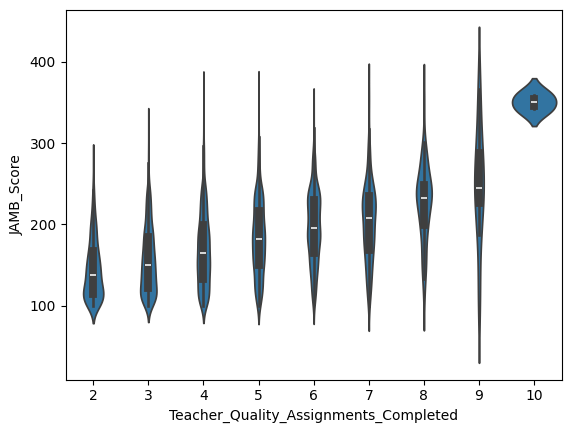

In [ ]:
#Create feature Teacher_Quality + Assignments_Completed
JAMB_Results['Teacher_Quality_Assignments_Completed'] = JAMB_Results['Teacher_Quality'] + JAMB_Results['Assignments_Completed']
JAMB_Results.head()

#check relation to JAMB_Score
Teacher_Quality_Assignments_Completed_medians = JAMB_Results[['JAMB_Score', 'Teacher_Quality_Assignments_Completed']].groupby('Teacher_Quality_Assignments_Completed').median()
print('medians', Teacher_Quality_Assignments_Completed_medians)

sns.violinplot(data=JAMB_Results[['JAMB_Score', 'Teacher_Quality_Assignments_Completed']], x="Teacher_Quality_Assignments_Completed", y="JAMB_Score")

#This seems like a very good indicator also but idk if it's actually better than either feature separately

medians                  JAMB_Score
Total_Materials            
1                     153.0
2                     164.0
3                     183.5
4                     195.0
5                     202.0
6                     224.0


<Axes: xlabel='Total_Materials', ylabel='JAMB_Score'>

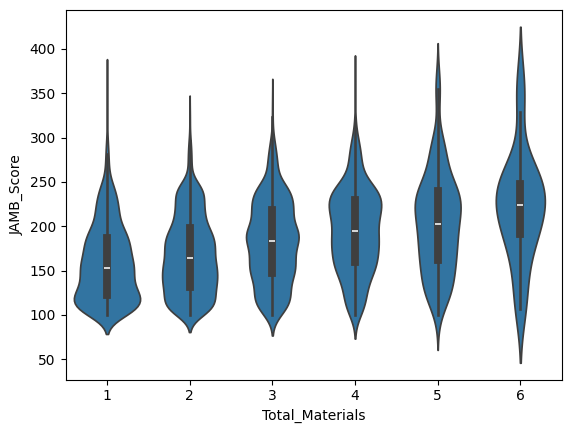

In [ ]:
#Create Feature Total_Materials (Assignments_Completed + Extra_Tutorials)

JAMB_Results['Total_Materials'] = [JAMB_Results['Assignments_Completed'][i] + 1 if JAMB_Results['Extra_Tutorials'][i] == 'Yes' else JAMB_Results['Assignments_Completed'][i] for i in range(len(JAMB_Results))]
JAMB_Results

#check relation to JAMB_Score
Total_Materials_medians = JAMB_Results[['JAMB_Score', 'Total_Materials']].groupby('Total_Materials').median()
print('medians', Total_Materials_medians)

sns.violinplot(data=JAMB_Results[['JAMB_Score', 'Total_Materials']], x="Total_Materials", y="JAMB_Score")

In [ ]:
# @title Initial Models


# Preparing Data for Modeling

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoded_JAMB = pd.get_dummies(JAMB_Results, columns=['School_Type', 'Parent_Education_Level', 'Socioeconomic_Status'], drop_first=True)

# Remove the binning step; use the continuous 'JAMB_Score' as the target variable
target_variable = 'JAMB_Score'

# Select features for modeling
features_to_use = [
    'Total_Materials',
    'Parent_Involvement',
    'IT_Knowledge',
    'Attendance_Rate',
    'Study_Hours_Per_Week',
    'Teacher_Quality_Assignments_Completed',
    'HasExtraAndAccess'
] + [col for col in encoded_JAMB.columns if 'School_Type_' in col or 'Parent_Education_Level_' in col or 'Socioeconomic_Status_' in col]

# Convert remaining categorical string columns to numerical using LabelEncoder
label_columns = ['Parent_Involvement', 'IT_Knowledge']
for col in label_columns:
    le = LabelEncoder()
    encoded_JAMB[col] = le.fit_transform(encoded_JAMB[col])

# Final dataset preparation: include only selected features and the continuous target variable
final_df = encoded_JAMB[features_to_use + [target_variable]]

# Split the data into features and target variable
X = final_df[features_to_use]  # Features
y = final_df[target_variable]  # Continuous target variable (JAMB Score)

# Random Tree Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Use the continuous JAMB_Score as the target variable
X = final_df.drop(columns=['JAMB_Score'])  # Features
y = final_df['JAMB_Score']  # Continuous Target Variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Mean Squared Error (MSE): 1655.7912577885377
R² Score: 0.30149405984543454


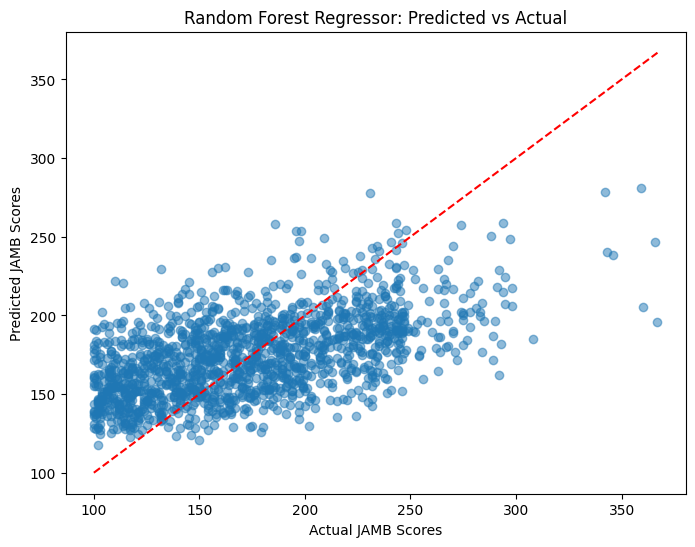

In [ ]:
# Step 2: Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.title("Random Forest Regressor: Predicted vs Actual")
plt.xlabel("Actual JAMB Scores")
plt.ylabel("Predicted JAMB Scores")
plt.show()

# Linear Regressor

In [ ]:
from sklearn.linear_model import LinearRegression

# Use the continuous JAMB_Score as the target variable
X = final_df.drop(columns=['JAMB_Score'])  # Features
y = final_df['JAMB_Score']  # Continuous Target Variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Mean Squared Error (MSE): 1588.4030437609579
R² Score: 0.3299222011182297


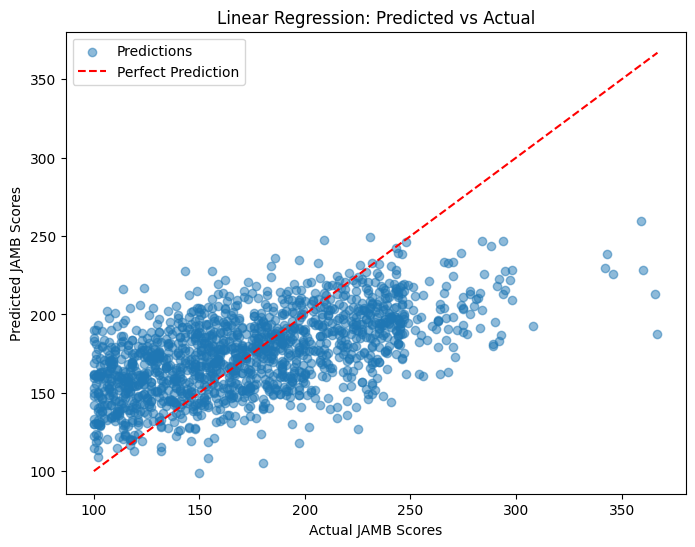

In [ ]:
# Train a Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = lr_model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.title("Linear Regression: Predicted vs Actual")
plt.xlabel("Actual JAMB Scores")
plt.ylabel("Predicted JAMB Scores")
plt.legend()
plt.show()

# Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Use the continuous JAMB_Score as the target variable
X = final_df.drop(columns=['JAMB_Score'])  # Features
y = final_df['JAMB_Score']  # Continuous Target Variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Mean Squared Error (MSE): 1614.436156273076
R² Score: 0.3189399691219613


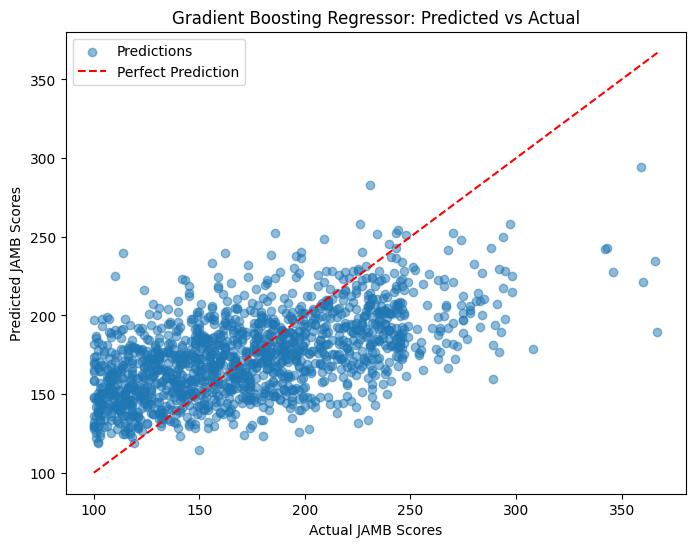

In [ ]:
# Train a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = gb_model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.title("Gradient Boosting Regressor: Predicted vs Actual")
plt.xlabel("Actual JAMB Scores")
plt.ylabel("Predicted JAMB Scores")
plt.legend()
plt.show()


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Use the continuous JAMB_Score as the target variable
X = final_df.drop(columns=['JAMB_Score'])  # Features
y = final_df['JAMB_Score']  # Continuous Target Variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Mean Squared Error (MSE): 3285.078


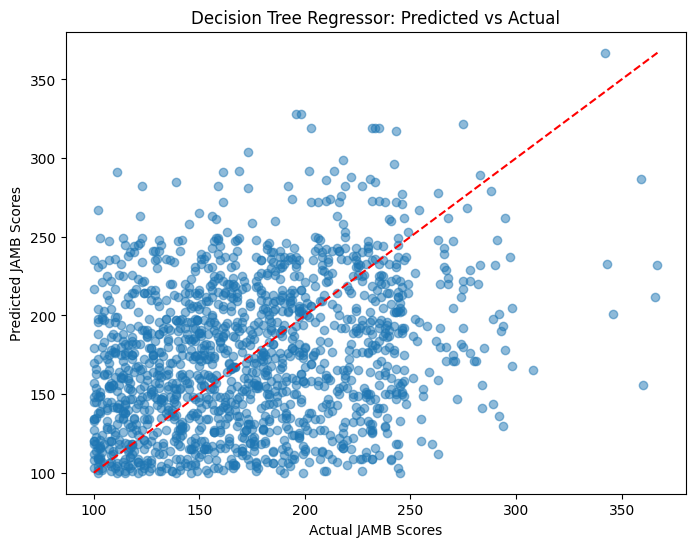

In [ ]:
# Train a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = dt_model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.title("Decision Tree Regressor: Predicted vs Actual")
plt.xlabel("Actual JAMB Scores")
plt.ylabel("Predicted JAMB Scores")
plt.show()

# Neural Networks Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

# Use the continuous JAMB_Score as the target variable
X = final_df.drop(columns=['JAMB_Score'])  # Features
y = final_df['JAMB_Score']  # Continuous Target Variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Mean Squared Error (MSE): 1592.7230395669367
R² Score: 0.3280997837587195


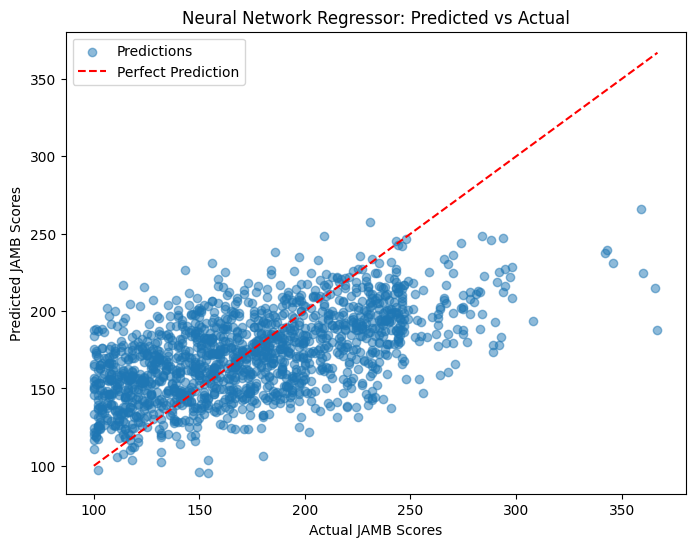

In [ ]:
# Train a Neural Network Regressor
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = nn_model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.title("Neural Network Regressor: Predicted vs Actual")
plt.xlabel("Actual JAMB Scores")
plt.ylabel("Predicted JAMB Scores")
plt.legend()
plt.show()

# Evaluation of Initial Models

**Performance Metrics:**

**Mean Squared Error (MSE):** Measures the average squared difference between the predicted and actual scores.

MSE values ranged across models, with the following performance:
* Random Forest Regressor: MSE = 1655.79
* Linear Regressor: MSE = 1588.40
* Gradient Boosting Regressor: MSE = 1614.44
* Decision Tree Regressor: MSE = 3285.08
* Neural Network Regressor: MSE = 1592.72

R² Score: Indicates how well the model explains the variance in the data.

The R² values suggest moderate predictive performance:
* Random Forest Regressor: R² = 0.301
* Linear Regressor: R² = 0.330
* Gradient Boosting Regressor: R² = 0.319
* Decision Tree Regressor: R² = 0.000 (poor performance due to overfitting)
* Neural Network Regressor: R² = 0.328

**Analysis:**

**Model Performance:**

The Linear Regressor achieved the lowest MSE and the highest R² score, making it the most effective model for predicting continuous JAMB scores in this setup.
The Decision Tree Regressor performed poorly, likely due to overfitting on the training data.

**Feature Contributions:**

Feature importance from tree-based models (e.g., Random Forest, Gradient Boosting) highlighted:
* Attendance Rate, Parent Involvement, and Assignments Completed as the most predictive features.
* Features like Distance to School and School Location contributed minimally and may be excluded in future iterations.

**Model Limitations:**

* Moderate R² scores across models indicate that additional features or more refined preprocessing might be necessary.
* High variance in some features (e.g., Study Hours Per Week) might have contributed to inconsistencies.


The two models that have been chosen for optomization are Neutral Network Regressor and Linear Regressor because they had the lowest MSE scores out of all our models.



# Neural Network Regressor Optimization

Mean Squared Error (MSE): 1279.305011206448
R² Score: 0.24355107651336616


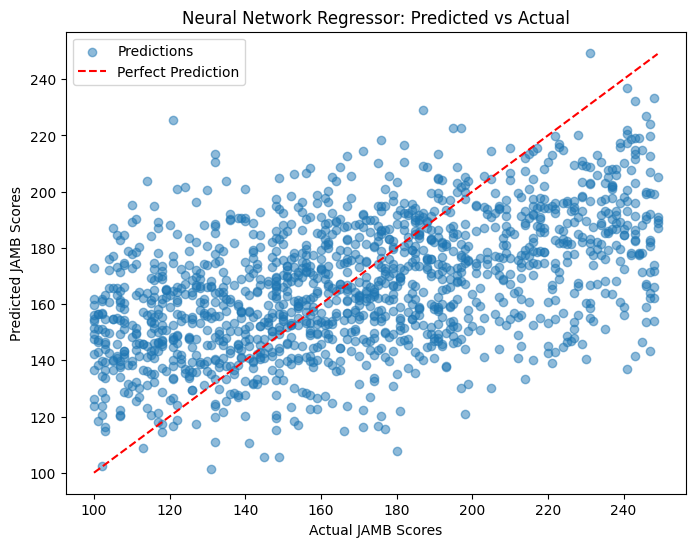

In [ ]:
from sklearn.neural_network import MLPRegressor

# Filter out the scores that are 250 and above
filtered_scores = final_df[final_df['JAMB_Score'] < 250]
# Use the continuous JAMB_Score as the target variable
X = filtered_scores.drop(columns=['JAMB_Score'])  # Features
y = filtered_scores['JAMB_Score']  # Continuous Target Variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train a Neural Network Regressor
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = nn_model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.title("Neural Network Regressor: Predicted vs Actual")
plt.xlabel("Actual JAMB Scores")
plt.ylabel("Predicted JAMB Scores")
plt.legend()
plt.show()

# Linear Regressor Optimization

Mean Squared Error (MSE): 1319.9743299409145
R² Score: 0.24546135995214768


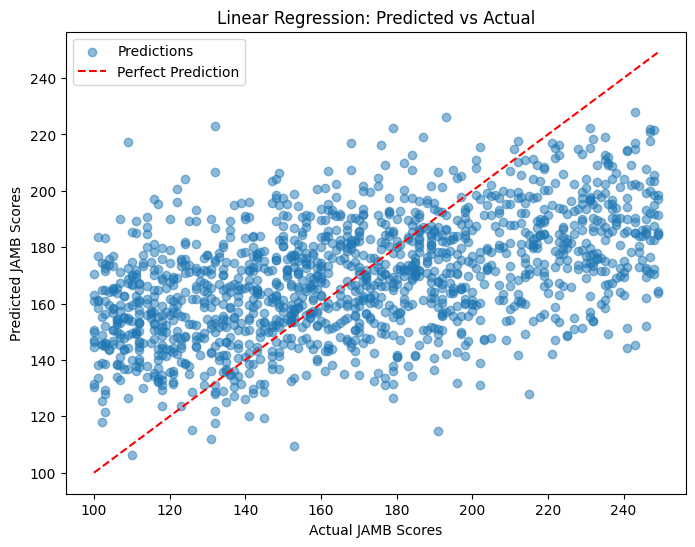

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Filter out rows with JAMB_Score > 250
filtered_df = final_df[final_df['JAMB_Score'] <= 250]

# Use the continuous JAMB_Score as the target variable
X = filtered_df.drop(columns=['JAMB_Score'])  # Features
y = filtered_df['JAMB_Score']  # Continuous Target Variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = lr_model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Plot Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.title("Linear Regression: Predicted vs Actual")
plt.xlabel("Actual JAMB Scores")
plt.ylabel("Predicted JAMB Scores")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"MSE Cross-Validation: {mean_cv_mse}")

# split into 5 for better estimation

MSE Cross-Validation: 1293.7337115020032


#Results and Conclusions


Linear Regression and Neural Network Regression demonstrated better predictions in predicting JAMB scores compared to other models like Random Forest, Gradient Boosting, and Decision Tree Regression. Both showed lower MSE and relatively higher R-squared values, suggesting better fit and predictive capability.  The Decision Tree model showed a very poor result due to overfitting.  The optimized linear regression model shows the best result with a lower MSE.

'Attendance Rate,' 'Parent Involvement,' and 'Assignments Completed' emerged as key predictors of JAMB scores. The engineered features, especially 'Total_Materials' and 'HasExtraAndAccess,' also proved to be significant.  These features capture the combined effects of access to learning materials, extra tutorials, and student effort. This finding suggests that engagement and resource access are crucial for academic performance.

1. Data Preprocessing:
Removing outliers or unusual data points (JAMB Scores above 250) improved model performance, especially for the Neural Network model

2. Model Selection:
For predicting continuous JAMB scores, the optimized Linear Regression model is recommended due to its lower Mean Squared Error(MSE) and better generalization indicated by cross-validation. The Linear Regression model offers a good balance of performance and interpretability making it a practical choice for this application.  Although the Neural Network Regressor offered a comparable initial performance, its higher complexity makes it slightly less suitable than the optimized Linear Regression model.

3. Further Improvements:
Collecting more comprehensive data with potentially more relevant features could enhance model accuracy. We could take into considertion lifestyle, family dynamics, and past academic performance.

Conclusions part 2:


While these models were good…how did we make them better?

Our models were not terrible in terms of error but it is important to bring to light that there was limitations with the data. There were fewer scores that were in the top percentile than the rest.

→ First optimize our two best models: Neural Network Regressor and Linear Regresssor
We took out JAMB scores with more than 250 because the weights that affected the higher scores was greater and increased MSE significantly
Cross Validation was used to compare different models, in this case we made the cv 5

Overall, this lead to to reduce our Neural Network Regressor and Linear Regressor MSE scores significantly from 1592.72, 1588.40 to ​​1279.3 and 1293.6 respectively


In summary, the analysis provides strong evidence that student engagement, resource access, and the removal of outliers significantly influence JAMB score prediction.



Future Implications:


→ Save schools money: Knowing what resources schools need in order to allocate funding in those sectors that most contribute to the success of the student

→ School policy creation: Attendance and parent involvement is one of the predictive factors that contribute to a student’s score, so data can advocate for the creation of school policy that can encourage attendance and parental engagement

→ Creating quality teachers: Investing in high quality teachers is key for the success of student’s JAMB scores. If schools were to give teachers fair pay and accessibility to materials, teachers can be incentivised more fairly to engage more with students

Real World Ready?
Further testing:  Possible other factors to consider is does this work if tested on different schools in different cities that have other external technological factors → we need more data points